In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Overlaid Histograms

In [6]:
height = Table.read_table('galton.csv').select(1, 2, 7).relabeled(2, 'child')
height.show(3)

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


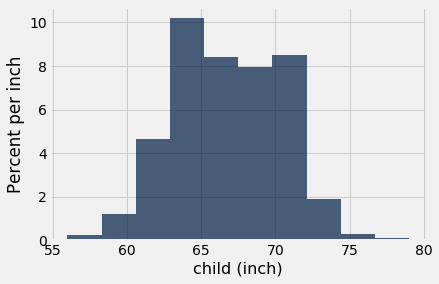

In [7]:
height.hist('child', unit='inch')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


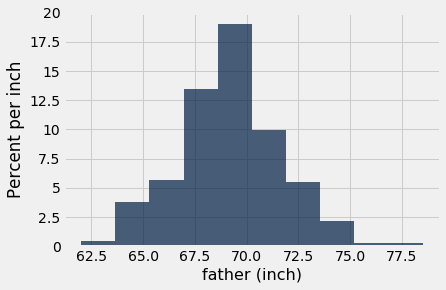

In [8]:
height.hist('father', unit='inch')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


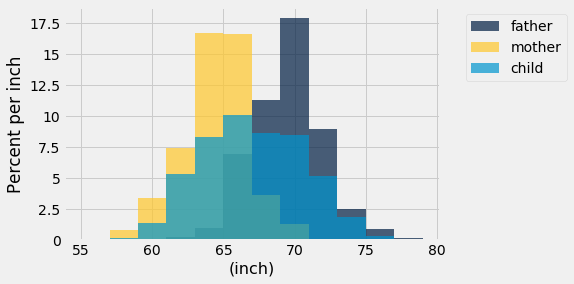

In [9]:
height.hist(unit='inch', bins=np.arange(55, 80, 2))

## Functions

In [10]:
def double(x):
    """ Double x """
    return 2*x

In [11]:
double(5)

10

In [12]:
double(5/4)

2.5

In [13]:
y = 5
double(y/4)

2.5

In [14]:
x

NameError: name 'x' is not defined

In [15]:
x = 1.5
double(x)

3.0

In [16]:
x

1.5

In [17]:
counts = make_array(1, 2, 3)
total = counts.sum()
np.round((counts/total)*100, 2)

array([16.67, 33.33, 50.  ])

In [18]:
def percents(counts):
    """Convert the counts to percents out of the total."""
    total = counts.sum()
    return np.round((counts/total)*100, 2)

In [19]:
percents(make_array(2, 4, 8, 6))

array([10., 20., 40., 30.])

In [20]:
# percents(2)

In [21]:
def percents(counts, decimal_places=2):
    """Convert the counts to percents out of the total."""
    total = sum(counts)
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1), "or", percents(parts, decimal_places=1))
print("Rounded to the default number of decimal places:", percents(parts))

Rounded to 1 decimal place: [28.6 14.3 57.1] or [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]


## Apply

In [22]:
def cut_off_at_a_billion(x):
    """The smaller of x and 1,000,000,000"""
    return min(x, 1e9)

In [23]:
cut_off_at_a_billion(123)

123

In [24]:
cut_off_at_a_billion(123456789)

123456789

In [25]:
cut_off_at_a_billion(1234567890)

1000000000.0

In [26]:
top = Table.read_table('top_movies_2017.csv').where('Studio', 'Fox')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
The Empire Strikes Back,Fox,290475067,872825900,1980
Avatar,Fox,760507625,865082100,2009
Return of the Jedi,Fox,309306177,836188200,1983
Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969
Independence Day,Fox,306169268,615800300,1996
Home Alone,Fox,285761243,602157000,1990
Cleopatra (1963),Fox,57777778,597261000,1963


In [27]:
cut_off = top.apply(cut_off_at_a_billion, 'Gross (Adjusted)')
cut_off

array([1.000000e+09, 1.000000e+09, 8.728259e+08, 8.650821e+08,
       8.361882e+08, 8.028743e+08, 6.272593e+08, 6.158003e+08,
       6.021570e+08, 5.972610e+08, 5.818909e+08, 5.456296e+08,
       5.273955e+08, 4.895672e+08, 4.880784e+08, 4.772526e+08,
       4.753347e+08, 4.683642e+08, 4.058042e+08, 3.759846e+08,
       3.724394e+08, 3.720429e+08, 3.541648e+08, 3.413578e+08])

In [28]:
cut_off_at_a_billion

<function __main__.cut_off_at_a_billion>

In [29]:
type(cut_off_at_a_billion)

function

In [30]:
help(cut_off_at_a_billion)

Help on function cut_off_at_a_billion in module __main__:

cut_off_at_a_billion(x)
    The smaller of x and 1,000,000,000



## Prediction

In [45]:
height

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5
75.5,66.5,65.5
75.5,66.5,65.5
75,64,71
75,64,68


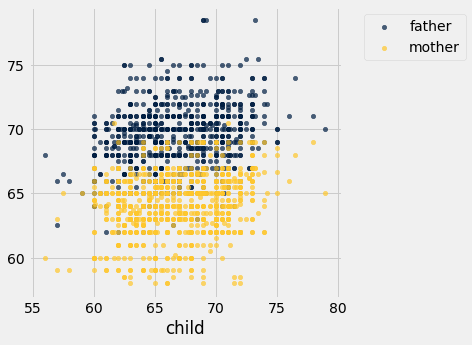

In [46]:
height.scatter(2)

In [47]:
height = height.with_column(
    'parent average', (height.column('mother') + height.column('father')) / 2
)

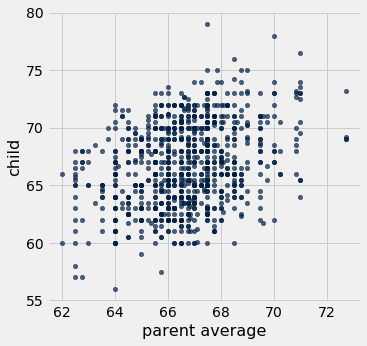

In [48]:
height.scatter('parent average', 'child')

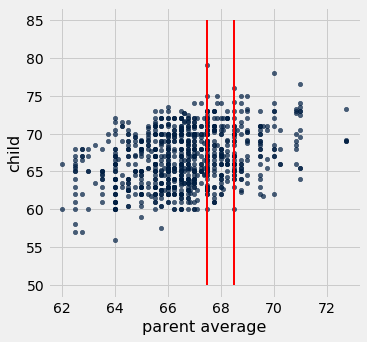

In [49]:
height.scatter('parent average', 'child')
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)

In [50]:
close_to_68 = height.where('parent average', are.between(67.5, 68.5))
close_to_68

father,mother,child,parent average
74,62,74,68
74,62,70,68
74,62,68,68
74,62,67,68
74,62,67,68
74,62,66,68
74,62,63.5,68
74,62,63,68
74,61,65,67.5
73.2,63,62.7,68.1


In [51]:
close_to_68.column('child').mean()

67.62

In [64]:
def predict_child(pa):
    close_points = height.where('parent average', are.between(pa - 0.5, pa + 0.5))
    return close_points.column('child').mean()                       

In [65]:
predict_child(68)

67.62

In [66]:
predict_child(65)

65.83829787234043

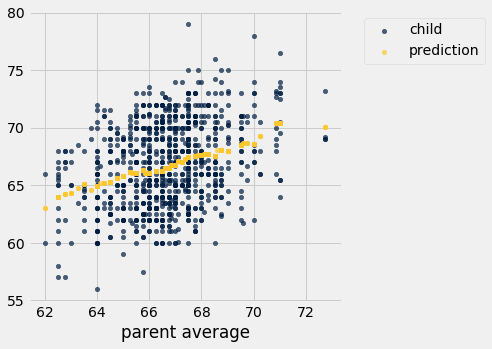

In [67]:
# Apply predict_child to all the midparent heights

height.with_column(
    'prediction', height.apply(predict_child, 'parent average')
).select(2, 3, 4).scatter('parent average')